In [1]:
import umap
from sklearn.manifold import TSNE
import numpy as np
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from sklearn.decomposition import PCA
from hdimvis.visualise_layouts_and_metrics.plot import show_generation_metrics, show_layout
from  sklearn.manifold import SpectralEmbedding, MDS
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from experiments.utils.LayoutHistogram import LayoutHistogram
from experiments.utils.layout_shannon_entropy import calculate_entropy
from hdimvis.metrics.stress.stress import vectorised_stress
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean,manhattan
from pathlib import Path


In [2]:
dataset = DataFetcher.fetch_data('coil20')

####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################


In [8]:
embedding_PCA = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
embedding_PCA *= 10/np.std(embedding_PCA)

C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


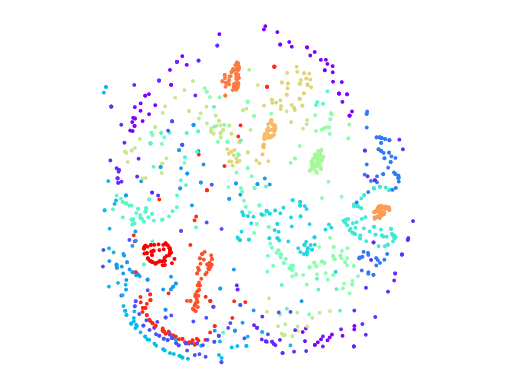

In [4]:
embedding_MDS = MDS(n_components=2).fit_transform(dataset.data).astype(np.float64)
show_layout(positions=embedding_MDS, labels=dataset.labels)

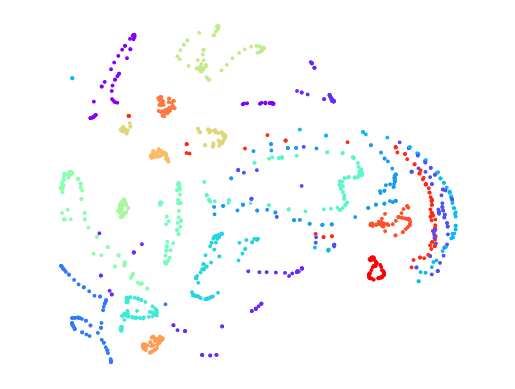

In [3]:
embedding_tsne = TSNE(n_components=2, perplexity=500).fit_transform(dataset.data)
show_layout(positions=embedding_tsne, labels=dataset.labels)

####################
A 2D layout of the "coil20" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 3
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################


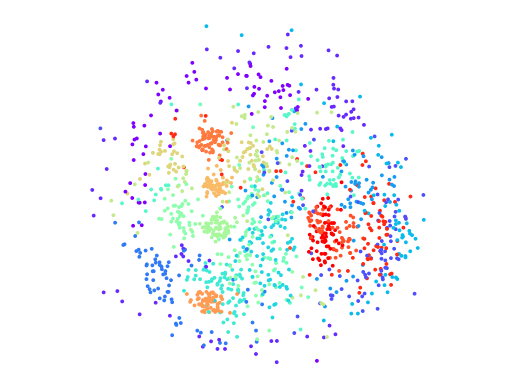

In [9]:
sned = SNeD(dataset=dataset, ntet_size=3, initial_layout=embedding_PCA)
layout_squad = LayoutCreation.create_layout(sned, no_iters=1000, optional_metric_collection=None)
show_layout(positions=layout_squad.get_final_positions(), labels=dataset.labels)

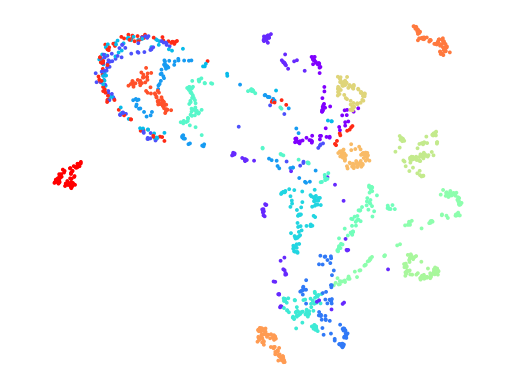

In [10]:
embedding_umap = umap.UMAP(n_neighbors=500).fit_transform(dataset.data)
show_layout(positions=embedding_umap, labels=dataset.labels)